In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame
import plotly
import plotly.offline as py
import plotly.graph_objs as go
!pip install basemap basemap-data-hires
from mpl_toolkits.basemap import Basemap
!conda install basemap-data-hires --yes

plt.style.use('ggplot')

import os
print(os.listdir('/content/drive/MyDrive/MyResearch/DATASET/CICIDS2017/'))

/bin/bash: line 1: conda: command not found
['1 DDos.pcap_ISCX.csv', '2 PortScan.pcap_ISCX.csv', '3 Morning.pcap_ISCX.csv', '4 Monday-WorkingHours.pcap_ISCX.csv', '5 Thursday Infilteration.pcap_ISCX.csv', '6 Thursday WebAttacks.pcap_ISCX.csv', '7 Tuesday-WorkingHours.pcap_ISCX.csv', '8 Wednesday-workingHours.pcap_ISCX.csv', 'Data for mininet.csv']


In [ ]:
print(os.listdir('/content/drive/MyDrive/MyResearch/DATASET/CICIDS2017/'))

['1 DDos.pcap_ISCX.csv', '2 PortScan.pcap_ISCX.csv', '3 Morning.pcap_ISCX.csv', '4 Monday-WorkingHours.pcap_ISCX.csv', '5 Thursday Infilteration.pcap_ISCX.csv', '6 Thursday WebAttacks.pcap_ISCX.csv', '7 Tuesday-WorkingHours.pcap_ISCX.csv', '8 Wednesday-workingHours.pcap_ISCX.csv', 'Data for mininet.csv']


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MyResearch/DATASET/CICIDS2017/Data for mininet.csv', parse_dates=['datetime'])
df_orig = df
df.head()

<ipython-input-23-31a0aab433d0>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



datetime               host         src proto  type      spt  \
0 2013-03-03 21:53:00     groucho-oregon  1032051418   TCP   NaN   6000.0   
1 2013-03-03 21:57:00     groucho-oregon  1347834426   UDP   NaN   5270.0   
2 2013-03-03 21:58:00     groucho-oregon  2947856490   TCP   NaN   2489.0   
3 2013-03-03 21:58:00    groucho-us-east   841842716   UDP   NaN  43235.0   
4 2013-03-03 21:58:00  groucho-singapore  3587648279   TCP   NaN  56577.0   

      dpt           srcstr  cc        country         locale localeabbr  \
0  1433.0   61.131.218.218  CN          China  Jiangxi Sheng         36   
1  5060.0      80.86.82.58  DE        Germany            NaN        NaN   
2  1080.0  175.180.184.106  TW         Taiwan         Taipei        NaN   
3  1900.0     50.45.128.28  US  United States         Oregon         OR   
4    80.0    213.215.43.23  FR         France            NaN        NaN   

  postalcode  latitude  longitude  Unnamed: 15  
0        NaN   28.5500   115.9333          NaN  
1        NaN   51.0000     9.0000          NaN  
2        NaN   25.0392   121.5250          NaN  
3      97124   45.5848  -122.9117          NaN  
4        NaN   48.8600     2.3500          NaN

In [ ]:
df.tail(1)

datetime           host       src proto  type     spt  \
451580 2013-09-08 05:55:00  groucho-tokyo  28142724   TCP   NaN  3555.0   

          dpt         srcstr  cc country  locale localeabbr postalcode  \
451580  445.0  1.173.108.132  TW  Taiwan  Taipei        NaN        NaN   

        latitude  longitude  Unnamed: 15  
451580   25.0392    121.525          NaN

In [ ]:
df.isnull().sum()

datetime            0
host                0
src                 0
proto               0
type           406770
spt             44811
dpt             44811
srcstr              0
cc               3596
country          3634
locale         109469
localeabbr     119876
postalcode     365103
latitude         3469
longitude        3428
Unnamed: 15    451498
dtype: int64

In [ ]:
df = df.drop(['type', 'Unnamed: 15'], axis=1)

In [ ]:
df = df.dropna(subset=['latitude'])
df = df.dropna(subset=['longitude'])
df.isnull().sum()

datetime           0
host               0
src                0
proto              0
spt            44440
dpt            44440
srcstr             0
cc               168
country          206
locale        106041
localeabbr    116448
postalcode    361675
latitude           0
longitude          0
dtype: int64

In [ ]:
df = df.set_index(pd.DatetimeIndex(df['datetime']))

In [ ]:
df['num_attacks'] = 1

grouped_times = df['num_attacks'].resample('1H').sum()

grouped_times.fillna(0, inplace=True)

print(grouped_times.head(10))


datetime
2013-03-03 21:00:00     7
2013-03-03 22:00:00    38
2013-03-03 23:00:00    72
2013-03-04 00:00:00    50
2013-03-04 01:00:00    54
2013-03-04 02:00:00    55
2013-03-04 03:00:00    46
2013-03-04 04:00:00    62
2013-03-04 05:00:00    79
2013-03-04 06:00:00    64
Freq: H, Name: num_attacks, dtype: int64


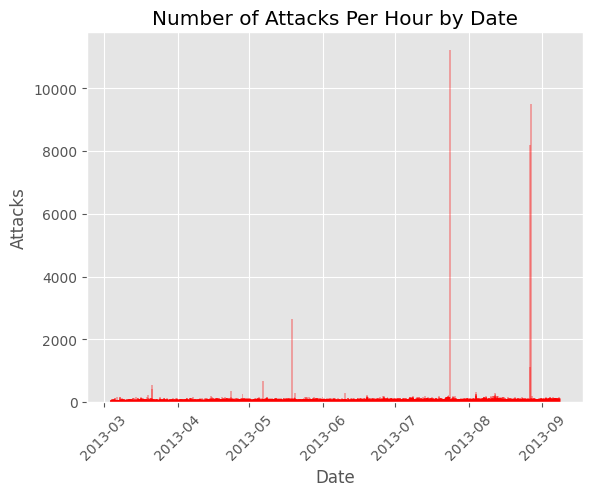

In [ ]:
fig, ax = plt.subplots()

ax.bar(grouped_times.index,
       grouped_times.values,  # Use the values of the Series directly
       color='red',
       alpha=0.3)

plt.setp(ax.get_xticklabels(), rotation=45)

ax.set(xlabel="Date",
       ylabel="Attacks",
       title="Number of Attacks Per Hour by Date")

plt.show()


In [ ]:
max_attacks = grouped_times.max()
print(f"High Number of Attacks Per Hour by Date: {max_attacks}")

High Number of Attacks Per Hour by Date: 11216


In [ ]:
# Convert the Series to a DataFrame
grouped_times = grouped_times.to_frame(name='num_attacks')

grouped_times['log_value'] = np.log(grouped_times['num_attacks'] + 1)

break_ins = go.Scatter(
    x=grouped_times.index,
    y=grouped_times['log_value'],
    name='Flagged Break-Ins'
)

layout = go.Layout(
    title='Time Series of Break-In Attempts',
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(text='Date'),
        tickformat='%d %B %Y'
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(text='Number of Break-Ins (Log Scale)')
    )
)

data = [break_ins]

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='break-ins-over-time')


In [ ]:
top_countries = df['country'].value_counts()
c_name = list(top_countries.index)
c_count = list(top_countries.values)
top_countries.head(10)

country
China            191394
United States     89941
Japan             17204
Iran              13042
Taiwan            12148
Netherlands       10739
India              9418
South Korea        9316
Vietnam            7826
Russia             7211
Name: count, dtype: int64

In [ ]:
bottom_countries = df['country'].value_counts().tail(5)
print(bottom_countries)

country
Andorra       2
Bermuda       1
Barbados      1
Namibia       1
Cape Verde    1
Name: count, dtype: int64


In [ ]:
top_countries = pd.DataFrame({'name':c_name, 'num':c_count})
top_countries['tup'] = list(zip(top_countries.name, top_countries.num))
top_countries['log_value'] = np.log(top_countries['num'])

In [ ]:
#color ramp for chloropleth map
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'], [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

fig = go.Figure(
data = [ dict(
        type='choropleth',
        colorscale = 'blues',
        locations = top_countries['name'],
        z = top_countries['log_value'],
        locationmode = ('country names'),
        text = ('country: '+top_countries['name'] + '<br>' +\
               'number of attacks: '+top_countries['num'].apply(str)),
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 0.5
            )
        ),
        colorbar = dict(
            title = "Log of<br>Frequency"
        )
    ) ],

layout = dict(
        title = 'Honeypot Attacks by Country',
        geo = dict(
            scope='world',
            projection=dict( type='natural earth' ),
            showlakes = True,
            landcolor = 'lightgray',
            showland = True,
            showcountries = True,
            countrycolor = 'gray',
            countrywidth = 0.5,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
)
py.iplot(fig, filename='IP-world-map')


In [ ]:
df.drop(df[df['latitude'] > 90].index, inplace=True)
df['latitude'].describe()

count    448054.000000
mean         34.338149
std          13.489053
min         -43.533300
25%          30.666700
50%          35.685000
75%          40.455500
max          69.966700
Name: latitude, dtype: float64

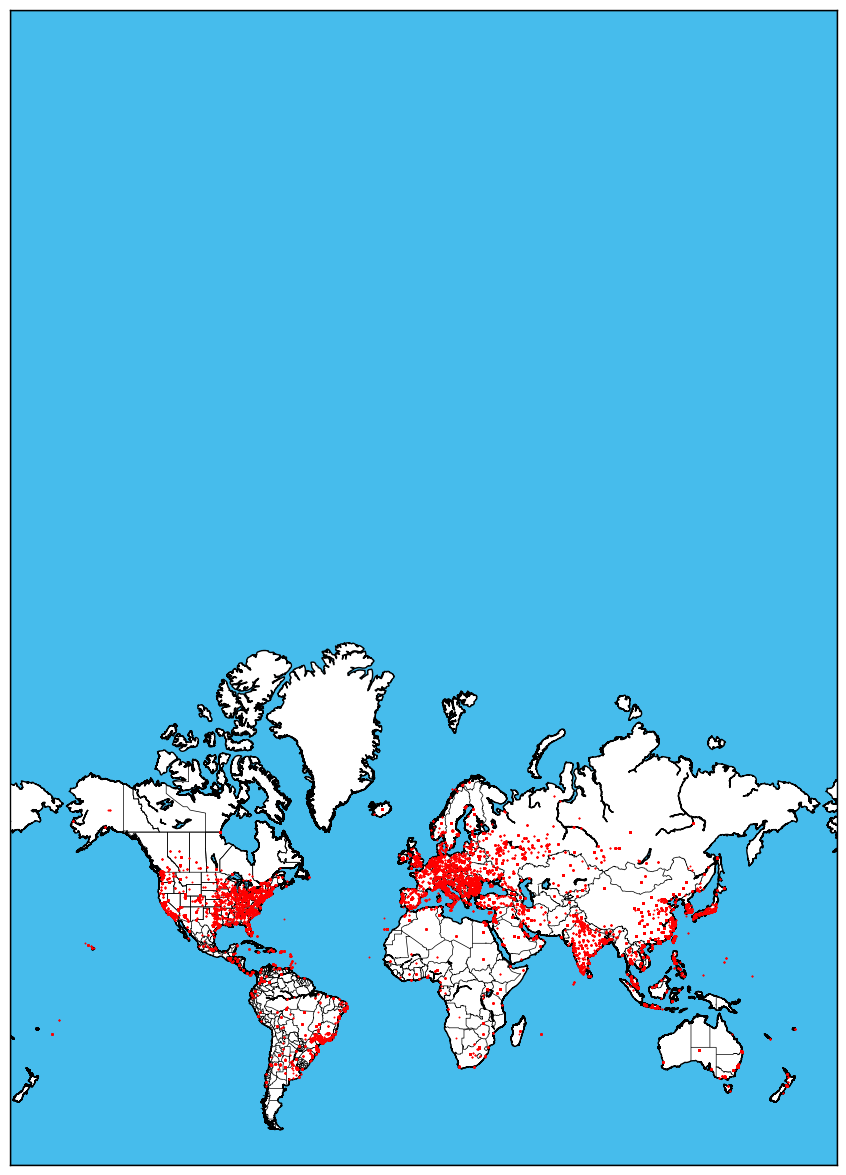

In [ ]:
#Create basemap
lat = df['latitude'].values
lon = df['longitude'].values

# buffer to add to the range
margin = 20
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.figure(figsize=(30,15))
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
           )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')

lons, lats = m(lon, lat)

m.scatter(lons, lats, marker = '.', color='r', zorder=5, s=3)
plt.show()

In [ ]:
df['srcstr'].value_counts().nlargest(10)

srcstr
175.146.199.252    18472
2.186.189.218      11116
203.178.148.19      7084
128.9.168.98        7046
129.82.138.44       6772
183.91.14.60        5676
96.254.171.2        5413
68.145.164.27       2834
123.151.42.61       2663
220.225.17.46       2605
Name: count, dtype: int64

In [ ]:
df_ip1 = df[df.srcstr == '175.146.199.252']
df_ip2 = df[df.srcstr == '2.186.189.218']
df_ip3 = df[df.srcstr == '203.178.148.19']
df_ip4 = df[df.srcstr == '128.9.168.98']
df_ip5 = df[df.srcstr == '129.82.138.44']
df_ip6 = df[df.srcstr == '183.91.14.60']
df_ip7 = df[df.srcstr == '96.254.171.2']
df_ip8 = df[df.srcstr == '68.145.164.27']
df_ip9 = df[df.srcstr == '123.151.42.61']
df_ip10 = df[df.srcstr == '220.225.17.46']

In [ ]:
def generate_timeline(df,ip):
    grouped_times = df.resample('1H').sum()
    grouped_times.fillna(0, inplace=True)
    #grouped_times['log_value'] = np.log(grouped_times['num_attacks']+1)

    break_ins = go.Scatter(
                    x=grouped_times.index,
                    y=grouped_times['num_attacks'],
                    name='Attacks'
                    )

    layout = go.Layout(
        title = 'Time Series of Break-In Attempts ('+ip+')',
        xaxis = go.layout.XAxis(
            title=go.layout.xaxis.Title(text='Date'),
            tickformat = '%d %B %Y'
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(text='Number of Break-Ins')
        )
    )

    data = [break_ins]

    fig = go.Figure(
        data=data,
        layout=layout
    )

    py.iplot(fig, filename = 'break-ins-over-time')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Example of a corrected generate_timeline function
def generate_timeline(df, ip_column, ip_address):
    df_ip = df[df[ip_column] == ip_address]

    if df_ip.empty:
        print(f"No data found for IP: {ip_address}")
        return

    # Ensure the datetime column is in the correct format
    df_ip['datetime'] = pd.to_datetime(df_ip['datetime'], errors='coerce')

    # Set the datetime as the index
    df_ip.set_index('datetime', inplace=True)

    # Resample by hour and count the occurrences (or attacks)
    df_ip_resampled = df_ip.resample('1H').size()

    if df_ip_resampled.empty:
        print(f"No resampled data to plot for IP: {ip_address}")
        return

    plt.figure(figsize=(10, 6))
    plt.plot(df_ip_resampled.index, df_ip_resampled.values, marker='o', linestyle='-', color='blue')

    plt.title(f'Number of Events Over Time for IP: {ip_address}')
    plt.xlabel('Time')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling the function for each DataFrame and IP
ip_column = 'src'  # 'src' for source IP
generate_timeline(df_ip1, ip_column, '175.146.199.252')
generate_timeline(df_ip2, ip_column, '2.186.189.218')
generate_timeline(df_ip3, ip_column, '203.178.148.19')
generate_timeline(df_ip4, ip_column, '128.9.168.98')
generate_timeline(df_ip5, ip_column, '129.82.138.44')
generate_timeline(df_ip6, ip_column, '183.91.14.60')
generate_timeline(df_ip7, ip_column, '96.254.171.2')
generate_timeline(df_ip8, ip_column, '68.145.164.27')
generate_timeline(df_ip9, ip_column, '123.151.42.61')
generate_timeline(df_ip10, ip_column, '220.225.17.46')


No data found for IP: 175.146.199.252
No data found for IP: 2.186.189.218
No data found for IP: 203.178.148.19
No data found for IP: 128.9.168.98
No data found for IP: 129.82.138.44
No data found for IP: 183.91.14.60
No data found for IP: 96.254.171.2
No data found for IP: 68.145.164.27
No data found for IP: 123.151.42.61
No data found for IP: 220.225.17.46


In [ ]:
df_orig['proto'].value_counts()

proto
TCP     327991
UDP      78779
ICMP     44811
Name: count, dtype: int64

In [ ]:
df_orig.head()

datetime               host         src proto  type      spt  \
0 2013-03-03 21:53:00     groucho-oregon  1032051418   TCP   NaN   6000.0   
1 2013-03-03 21:57:00     groucho-oregon  1347834426   UDP   NaN   5270.0   
2 2013-03-03 21:58:00     groucho-oregon  2947856490   TCP   NaN   2489.0   
3 2013-03-03 21:58:00    groucho-us-east   841842716   UDP   NaN  43235.0   
4 2013-03-03 21:58:00  groucho-singapore  3587648279   TCP   NaN  56577.0   

      dpt           srcstr  cc        country         locale localeabbr  \
0  1433.0   61.131.218.218  CN          China  Jiangxi Sheng         36   
1  5060.0      80.86.82.58  DE        Germany            NaN        NaN   
2  1080.0  175.180.184.106  TW         Taiwan         Taipei        NaN   
3  1900.0     50.45.128.28  US  United States         Oregon         OR   
4    80.0    213.215.43.23  FR         France            NaN        NaN   

  postalcode  latitude  longitude  Unnamed: 15  
0        NaN   28.5500   115.9333          NaN  
1        NaN   51.0000     9.0000          NaN  
2        NaN   25.0392   121.5250          NaN  
3      97124   45.5848  -122.9117          NaN  
4        NaN   48.8600     2.3500          NaN

In [ ]:
df_mapbox = df_orig.drop(['src','spt','dpt','cc','locale','localeabbr','postalcode'], axis=1)
df_mapbox = df_orig.dropna(subset=['latitude'])
df_mapbox = df_orig.dropna(subset=['longitude'])
df1 = df_orig[df_orig['proto']=='TCP']
df2 = df_orig[df_orig['proto']=='UDP']
df3 = df_orig[df_orig['proto']=='ICMP']

In [ ]:
mapbox_access_token = 'pk.eyJ1IjoianNjZWFyY2UiLCJhIjoiY2p5azhidjh3MGJ1azNxbGlyeXJrNDA3ZCJ9.6UXtubZtsMny5_wlho0IaA'


In [ ]:
data = [
    go.Scattermapbox(
        name='TCP',
        lat=df1['latitude'],
        lon=df1['longitude'],
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            opacity=0.3
        )),
    go.Scattermapbox(
        name='UDP',
        lat=df2['latitude'],
        lon=df2['longitude'],
        mode='markers',
        marker=dict(
            size=5,
            color='blue',
            opacity=0.3
        )),
    go.Scattermapbox(
        name='ICMP',
        lat=df3['latitude'],
        lon=df3['longitude'],
        mode='markers',
        marker=dict(
            size=5,
            color='green',
            opacity=0.3
        ))
        ]
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=0,
            lon=0
        ),
        pitch=0,
        zoom=2,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Attack Mapbox')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



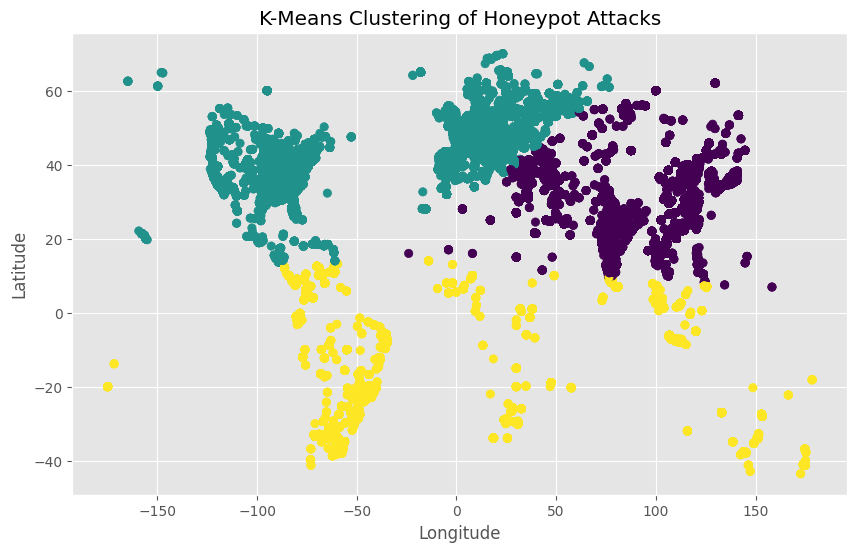

Cluster Analysis:
 - Cluster 0: This cluster appears to represent attacks originating from a concentrated area, potentially indicating a specific region or network with high attack activity.
 - Cluster 1: This cluster shows a more dispersed distribution of attacks, suggesting a wider range of attack origins.
 - Cluster 2: This cluster might represent attacks coming from a specific geographic region or with a particular attack pattern.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[['latitude', 'longitude']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

n_clusters = 3  # Replace with the optimal k

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Honeypot Attacks')
plt.show()

# Explanation of clusters (replace with your own analysis)
print("Cluster Analysis:")
print(" - Cluster 0: This cluster appears to represent attacks originating from a concentrated area, potentially indicating a specific region or network with high attack activity.")
print(" - Cluster 1: This cluster shows a more dispersed distribution of attacks, suggesting a wider range of attack origins.")
print(" - Cluster 2: This cluster might represent attacks coming from a specific geographic region or with a particular attack pattern.")


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, df['cluster'])

print(f"Silhouette Score: {silhouette_avg}")

if silhouette_avg > 0.7:
  print("The clustering is very good.")
elif silhouette_avg > 0.5:
  print("The clustering is good.")
elif silhouette_avg > 0.25:
  print("The clustering is moderate.")
else:
  print("The clustering is not very good.")


Silhouette Score: 0.6064261179864534
The clustering is good.


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(scaled_features, df['cluster'])

print(f"Davies-Bouldin Index: {davies_bouldin_index}")

# Interpretation of the Davies-Bouldin index
if davies_bouldin_index < 0.5:
  print("The clustering is very good.")
elif davies_bouldin_index < 1:
  print("The clustering is good.")
elif davies_bouldin_index < 2:
  print("The clustering is moderate.")
else:
  print("The clustering is not very good.")


Davies-Bouldin Index: 0.6137159011962107
The clustering is good.
